In [1]:
import pandas as pd
import numpy as np
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, classification_report

In [2]:
stroke = pd.read_csv("stroke-data.csv")

In [3]:
stroke.drop("id", axis=1, inplace=True)
stroke.drop(stroke[stroke["smoking_status"] == "Unknown"].index, inplace=True)
stroke['age'] = stroke['age'].astype('int')

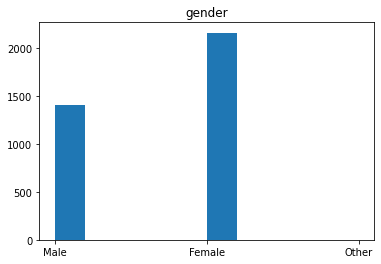

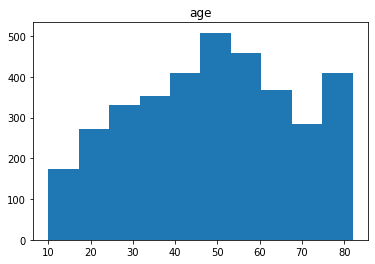

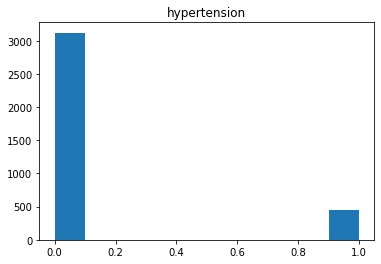

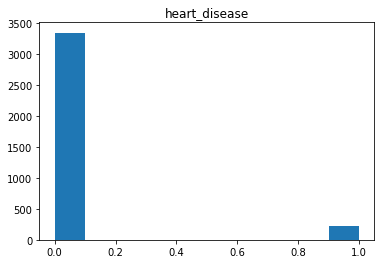

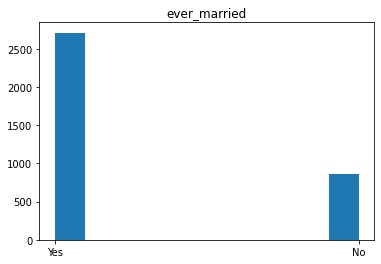

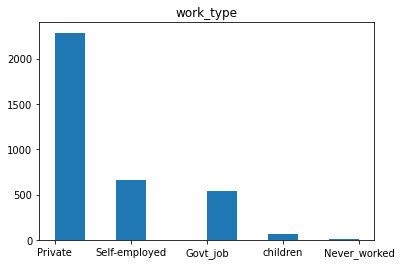

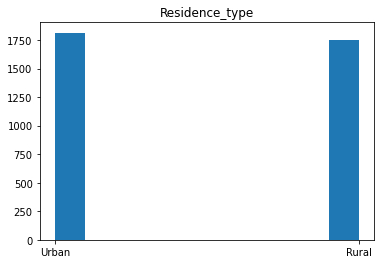

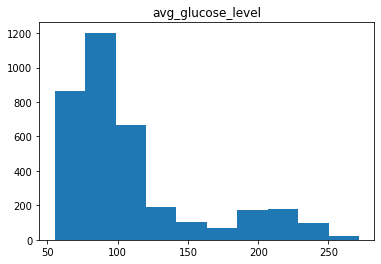

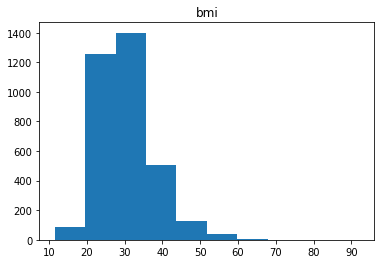

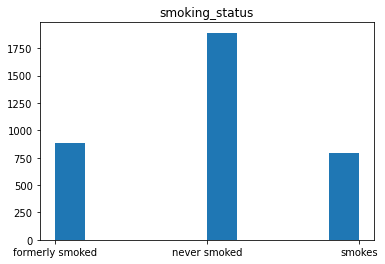

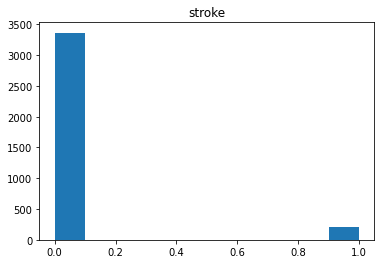

In [4]:
for feature in stroke.columns:
    plt.title(feature)
    plt.hist(stroke[feature])
    plt.show()

In [5]:
stroke.bmi.fillna(stroke.bmi.median(), inplace=True)

In [6]:
stroke.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61,0,0,Yes,Self-employed,Rural,202.21,29.1,never smoked,1
2,Male,80,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


<AxesSubplot:>

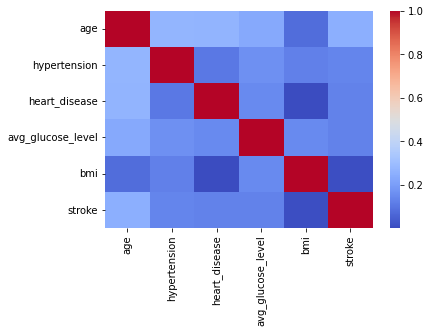

In [7]:
sns.heatmap(abs(stroke.corr()), cmap="coolwarm")

In [8]:
stroke['ever_married'] = np.where(stroke['ever_married'] == 'Yes', 1, 0)
stroke['gender'] = np.where(stroke['gender'] == 'Male', 1, 0)
stroke['Residence_type'] = np.where(stroke['Residence_type'] == 'Urban', 1, 0)

In [9]:
#stroke.work_type.unique()

In [10]:
#stroke.smoking_status.unique()

In [11]:
#stroke = pd.get_dummies(stroke, columns=['work_type', 'smoking_status'],prefix=['work', 'smoke'])

In [12]:
stroke = stroke.drop(columns=['work_type', 'Residence_type', 'smoking_status'])

In [13]:
stroke.head()

,gender,age,hypertension,heart_disease,ever_married,avg_glucose_level,bmi,stroke
0,1,67,0,1,1,228.69,36.6,1
1,0,61,0,0,1,202.21,29.1,1
2,1,80,0,1,1,105.92,32.5,1
3,0,49,0,0,1,171.23,34.4,1
4,0,79,1,0,1,174.12,24.0,1


In [14]:
X = stroke.drop(['stroke'],axis=1)
y = stroke['stroke']
sm = SMOTE(random_state=2)
X, y = sm.fit_resample(X, y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [23]:
X.sample(5)

,gender,age,hypertension,heart_disease,ever_married,avg_glucose_level,bmi
4503,1,73,1,0,0,219.413798,27.999685
2564,0,20,0,0,0,66.550000,26.900000
1901,0,45,0,0,0,103.940000,32.500000
4687,0,56,0,0,0,67.611452,37.924466
847,0,79,0,0,1,83.560000,28.700000


In [28]:
stroke['ever_married'].value_counts()

1    2710
0     856
Name: ever_married, dtype: int64

In [22]:
# Random Forest
RF = RandomForestClassifier()
RF.fit(X_train, y_train)
RF.pred = RF.predict(X_test)
RF_accuracy = accuracy_score(RF.pred, y_test)
print('Accuracy:', RF_accuracy)
precision = precision_score(y_test, RF.pred)
print('Precision:', precision)
print(classification_report(y_test, RF.pred))

Accuracy: 0.9041604754829123
Precision: 0.8765432098765432
              precision    recall  f1-score   support

           0       0.94      0.87      0.90       668
           1       0.88      0.94      0.91       678

    accuracy                           0.90      1346
   macro avg       0.91      0.90      0.90      1346
weighted avg       0.91      0.90      0.90      1346



In [16]:
import pickle

file = open("regression_rf.pkl", "wb")
pickle.dump(RF, file)